# Problem and Data Description

## Problem Description

The problem in the "Natural Language Processing with Disaster Tweets" competition is to build a machine learning model that can accurately classify tweets into two categories: those that are about real disasters and those that are not. The objective is to analyze the text of a tweet and predict whether it conveys information about a real disaster or not. This is a binary classification problem.

This project is about using social media analysis for emergency response efforts. The data in this project are tweets. There are three meaningful features: the full text of the tweet, the location from which the tweet was made, and a keyword the authors tagged as potentially indicating an accident.

Natural Language Processing (NLP) is a field of artificial intelligence that focuses on the interaction between computers and humans through natural language. In the context of this project, NLP techniques are used to process and analyze the text data contained in tweets to predict real world disasters.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [2]:
!pwd

/content


In [3]:
import os
os.listdir(".")

['.config', 'sample_submission.csv', 'test.csv', 'train.csv', 'sample_data']

In [2]:
import pandas as pd
import numpy as np

## Data Description

In [5]:
train_df = pd.read_csv("./train.csv")
display(train_df.head(), train_df.describe(include='all'))
print(train_df.shape)
train_df.info()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


(7613, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


**We have 7613 rows of data and 5 columns**

**Columns**

* id - a unique identifier for each tweet
* text - the text of the tweet
* location - the location the tweet was sent from (may be blank)
* keyword - a particular keyword from the tweet (may be blank)
* target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)





# Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data

In [6]:
# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Display the first few rows of the training data
print("Training Data Head:")
print(train_df.head())

# Display the first few rows of the test data
print("\nTest Data Head:")
print(test_df.head())

# Dataset sizes
print("\nTraining Data Size:", train_df.shape)
print("Test Data Size:", test_df.shape)

# Check for missing values in the training data
print("\nMissing Values in Training Data:")
print(train_df.isnull().sum())

# Check for missing values in the test data
print("\nMissing Values in Test Data:")
print(test_df.isnull().sum())

# Basic statistics of the training data
print("\nTraining Data Description:")
print(train_df.describe(include='all'))

# Distribution of the target variable
print("\nDistribution of the 'target' Variable:")
print(train_df['target'].value_counts(normalize=True))

Training Data Head:
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  

Test Data Head:
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in C

**Distribution of Target Variable**

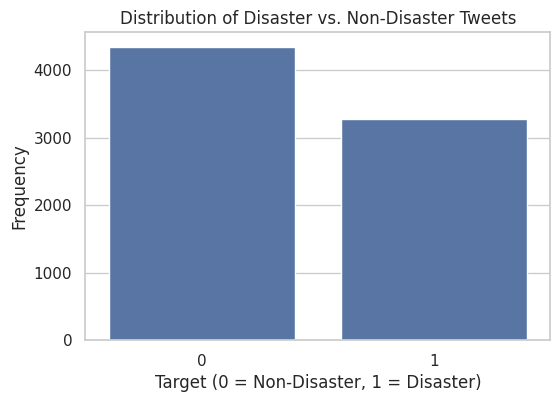

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=train_df)
plt.title('Distribution of Disaster vs. Non-Disaster Tweets')
plt.xlabel('Target (0 = Non-Disaster, 1 = Disaster)')
plt.ylabel('Frequency')
plt.show()


**This may not be 50:50 split but it is not so imbalanced that would require augmented data**

**Distribution of Tweet Lengths and Word Count**

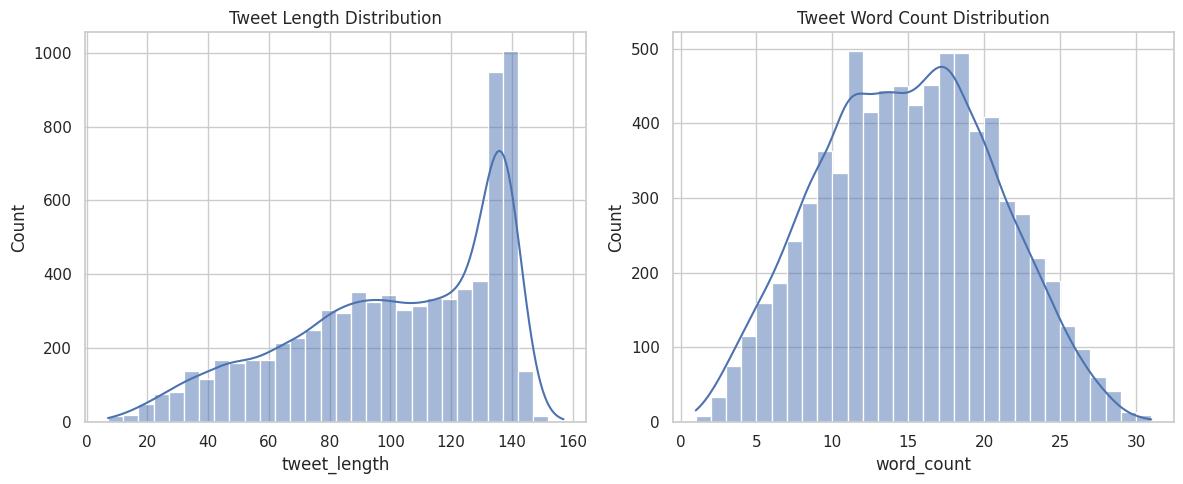

In [8]:
# Calculate tweet length and word count
train_df['tweet_length'] = train_df['text'].apply(len)
train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split()))

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(train_df['tweet_length'], bins=30, kde=True)
plt.title('Tweet Length Distribution')

plt.subplot(1, 2, 2)
sns.histplot(train_df['word_count'], bins=30, kde=True)
plt.title('Tweet Word Count Distribution')

plt.tight_layout()
plt.show()


**Most Common Words in Disaster and Non-Disaster Tweets**

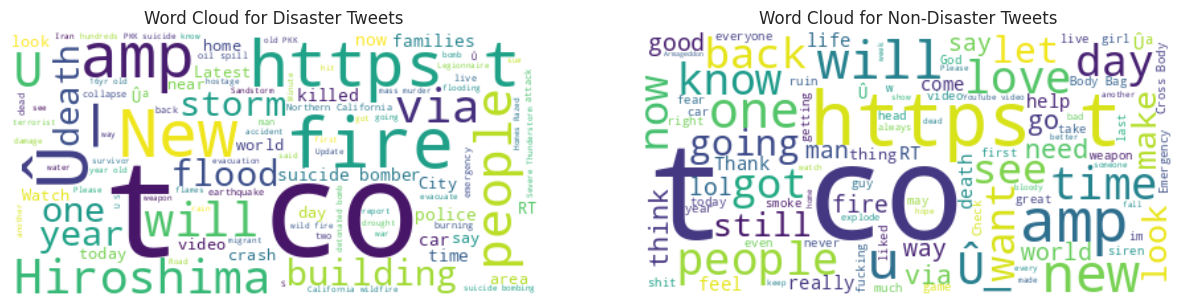

In [9]:
from wordcloud import WordCloud

# Combine all tweets for each category
disaster_tweets = ' '.join(train_df[train_df['target'] == 1]['text'])
non_disaster_tweets = ' '.join(train_df[train_df['target'] == 0]['text'])

# Generate word clouds
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
wordcloud_dis = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(disaster_tweets)
plt.imshow(wordcloud_dis, interpolation="bilinear")
plt.title('Word Cloud for Disaster Tweets')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_nondis = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(non_disaster_tweets)
plt.imshow(wordcloud_nondis, interpolation="bilinear")
plt.title('Word Cloud for Non-Disaster Tweets')
plt.axis('off')

plt.show()


**Distribution of the Keyword Feature**

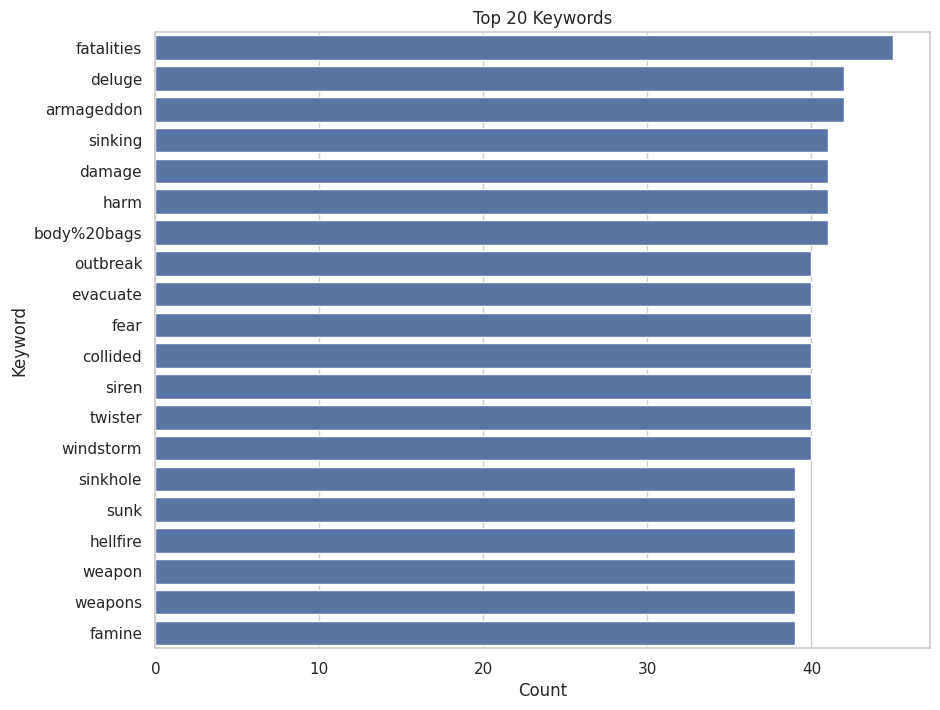

In [10]:
# Top 20 keywords in the dataset
plt.figure(figsize=(10, 8))
sns.countplot(y='keyword', data=train_df, order = train_df['keyword'].value_counts().iloc[:20].index)
plt.title('Top 20 Keywords')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.show()


## Missing Data Handling

In [11]:
# Check for missing values in the training data
print("\nMissing Values in Training Data:")
print(train_df.isnull().sum())

# Check for missing values in the test data
print("\nMissing Values in Test Data:")
print(test_df.isnull().sum())


Missing Values in Training Data:
id                 0
keyword           61
location        2533
text               0
target             0
tweet_length       0
word_count         0
dtype: int64

Missing Values in Test Data:
id             0
keyword       26
location    1105
text           0
dtype: int64


We do have missing data for keyword and location. Normally, we'll do something about missing data. But in this problem context, we would be predicting Target variable based on Text and may not use location at all. As fo Keyword, that is missing only from small number of rows. We can drop those rows or keep those. For now,. deciding to keep those but by replacing missing values with unknown.

In [12]:
# Replace missing values in the 'keyword' column with 'unknown' in the training data
train_df['keyword'] = train_df['keyword'].fillna('unknown')

# Replace missing values in the 'keyword' column with 'unknown' in the test data
test_df['keyword'] = test_df['keyword'].fillna('unknown')

# You can verify the changes by checking for missing values again
print("Missing Values in Training Data after Replacement:")
print(train_df['keyword'].isnull().sum())

print("Missing Values in Test Data after Replacement:")
print(test_df['keyword'].isnull().sum())


Missing Values in Training Data after Replacement:
0
Missing Values in Test Data after Replacement:
0


**Top keywords for positive class**

<Axes: ylabel='keyword'>

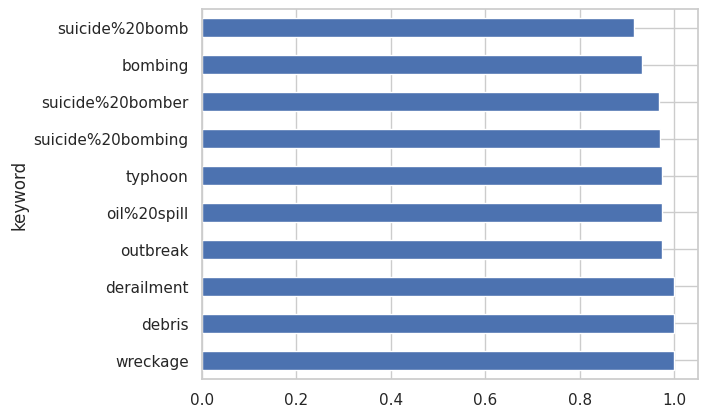

In [13]:
train_df.groupby('keyword')['target'].mean().sort_values(ascending=False).head(10).plot(kind='barh')

**Data Imputation**


We replaced missing value in keyword for both train and test data as pre-processing must match for NLP. We are not using test data for any other purpose here to avoid data leakage.

## Plan of Analysis

At this stage after EDA, we can outline our plan of analysis:

* Feature Engineering: Text preprocessing and Vectorization
* Model Selection and Training: Building baseline model, experimenting with parameters
* Evaluation
* Error Analysis
* Model Selection and Future Actions



# Model Architecture

Our goal here is to classify tweets into two categories: those about real disasters and those that are not. Given the textual nature of the data, a neural network that can understand the sequence and context of words is ideal.

**Reasoning:**

For handling text data, especially the intricate language seen in tweets, Recurrent Neural Networks (RNNs) and their more sophisticated forms such as Long Short-Term Memory (LSTM) networks and Gated Recurrent Units (GRUs) are exceptionally fitting. These models are really good at grasping the sequential dynamics of text, taking into account the arrangement of words and their contextual relevance within a sentence.

**LSTM:**

For this project, I've chosen to use an LSTM architecture. LSTMs, a variant of RNN, are good at learning and retaining information across extensive data sequences. Their strength lies in handling the issue of long term dependencies, enabling them to retain information for prolonged periods. This feature is especially beneficial for comprehending the context within longer tweets.

**Model:**

The architecture would start with an embedding layer, transforming words into compact and fixed size vector representations. This would help us with a more efficient approach than one-hot encoded vectors.
Later, an LSTM layer would be added to sequentially process these embeddings. Following the LSTM layer, one or several dense layers could be added, and finally an output layer equipped with a sigmoid activation function, appropriate for this binary classification task.

**Word Embeddings:**

For converting raw texts to word embeddings, we are using pre-trained embeddings like GloVe (Global Vectors for Word Representation).


**GloVe:** This method of word embedding utilizes the comprehensive global statistics of word co-occurrences within a text corpus to map words into a mutual vector space. GloVe's strength lies in its ability to encapsulate both semantic and syntactic attributes of words. Pre trained GloVe models are accessible in several sizes (dimensions), allowing for a choice that balances computational efficiency with the desired depth of precision.


GloVe constructs a vast co-occurrence matrix from the entire corpus, where each matrix element quantifies the frequency of two words occurring together. Following this, it applies matrix factorization methods to compress the size of this matrix. The primary objective here is to maintain words that are contextually similar in proximity within the vector space.

In [14]:
!pip install nltk

In [15]:
import nltk
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [16]:
import json
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
# Download the NLTK sentiment analyzer if necessary
nltk.download("vader_lexicon")

wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
import pandas as pd
import gensim
from gensim import corpora
from gensim import models
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import string
import itertools
punctuation = string.punctuation
stopwordsset = set(stopwords.words("english"))
stopwordsset.add('rt')
stopwordsset.add("'s")
from datetime import datetime

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [17]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Function to concatenate keyword and text with a space in between.
# It checks if the keyword is 'unknown' (or your chosen placeholder) to prevent
# adding unnecessary or redundant text.
def combine_keyword_text(row):
    keyword = row['keyword']
    text = row['text']
    if keyword and keyword.lower() != 'unknown':
        # Combine with a space if keyword is valid
        return keyword + " " + text
    else:
        return text

# Function to clean the text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Lowercase all texts
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    # Optionally: Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

train_df['combined_text'] = train_df.apply(combine_keyword_text, axis=1)
test_df['combined_text'] = test_df.apply(combine_keyword_text, axis=1)

# Cleaning the text data in the DataFrame
train_df['cleaned_text'] = train_df['combined_text'].apply(clean_text)
test_df['cleaned_text'] = test_df['combined_text'].apply(clean_text)


In [18]:
train_df.head()

,id,keyword,location,text,target,tweet_length,word_count,combined_text,cleaned_text
0,1,unknown,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,Our Deeds are the Reason of this #earthquake M...,deed reason may allah forgive u
1,4,unknown,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,5,unknown,NaN,All residents asked to 'shelter in place' are ...,1,133,22,All residents asked to 'shelter in place' are ...,resident asked shelter place notified officer ...
3,6,unknown,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,"13,000 people receive #wildfires evacuation or...",people receive evacuation order california
4,7,unknown,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby smoke pours school


In [19]:
train_df.tail(100)

,id,keyword,location,text,target,tweet_length,word_count,combined_text,cleaned_text
7513,10746,wreckage,NaN,KUALA LUMPUR (Reuters) - A piece of a wing tha...,1,139,28,wreckage KUALA LUMPUR (Reuters) - A piece of a...,wreckage kuala lumpur reuters piece wing washe...
7514,10747,wreckage,NaN,#science Now that a piece of wreckage from fli...,1,137,21,wreckage #science Now that a piece of wreckage...,wreckage piece wreckage flight mh confirmed rì...
7515,10748,wreckage,Africa,Malaysia PM confirms wreckage belongs to MH370...,1,92,9,wreckage Malaysia PM confirms wreckage belongs...,wreckage malaysia pm confirms wreckage belongs mh
7516,10749,wreckage,NaN,Wreckage 'Conclusively Confirmed' as From MH37...,1,136,17,wreckage Wreckage 'Conclusively Confirmed' as ...,wreckage wreckage conclusively confirmed mh ma...
7517,10750,wreckage,"Mumbai, Maharashtra",Wreckage 'Conclusively Confirmed' as From MH37...,1,136,17,wreckage Wreckage 'Conclusively Confirmed' as ...,wreckage wreckage conclusively confirmed mh ma...
...,...,...,...,...,...,...,...,...,...
7608,10869,unknown,NaN,Two giant cranes holding a bridge collapse int...,1,83,11,Two giant cranes holding a bridge collapse int...,two giant crane holding bridge collapse nearby...
7609,10870,unknown,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20,@aria_ahrary @TheTawniest The out of control w...,control wild fire california even northern par...
7610,10871,unknown,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,utckm volcano hawaii
7611,10872,unknown,NaN,Police investigating after an e-bike collided ...,1,137,19,Police investigating after an e-bike collided ...,police investigating ebike collided car little...


In [20]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2024-04-20 00:51:56--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-04-20 00:51:56--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-04-20 00:51:56--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [21]:
# This function loads the GloVe word embeddings from a given file into a Python dictionary.
# Each line of the file contains a word followed by its vector representation.
def load_glove_vectors(glove_file):
  # Initialize an empty dictionary to hold the word embeddings.
    embeddings = {}

    with open(glove_file, 'r') as f:
        for line in f:
            # Split the line into a list of strings. The first entry is the word,
            # and the remaining entries are the components of the vector.
            values = line.split()
            word = values[0]

            # Convert the vector components from strings to floats and create a numpy array.
            # The components start from the second item (index 1) since the first item is the word.

            vector = np.asarray(values[1:], dtype='float32')
            # Add the word and its vector representation to the dictionary.
            embeddings[word] = vector
    return embeddings

glove_file = 'glove.6B.100d.txt'
# Call the function and load the embeddings from the file into the 'glove_vectors' dictionary.
glove_vectors = load_glove_vectors(glove_file)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

import keras
import tensorflow as tf

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.initializers import Constant
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional,Flatten, BatchNormalization, GlobalMaxPool1D

from sklearn.model_selection import train_test_split

In [23]:
# Initialize the Tokenizer class which will be used to vectorize a text corpus
# by turning each text into a sequence of integers.
tokenizer = Tokenizer()

# Fit the tokenizer on the 'cleaned_text' column of the train_df DataFrame.
# This will build the word index which is a key-value pairing of words and their corresponding unique integer value.
tokenizer.fit_on_texts(train_df['cleaned_text'].values)

# Convert the list of texts (each text is a list of words) in the 'cleaned_text' column
# to a list of sequences. Each word in the text is replaced by its corresponding integer
# index in the word index created by the tokenizer.
X = tokenizer.texts_to_sequences(train_df['cleaned_text'].values)

# Pad the sequences to ensure that all sequences in the list have the same length.
# If a sequence is shorter than the longest sequence, it is padded with zeros at the end.
X = pad_sequences(X)

# 'X' now holds a 2D integer tensor that is suitable for feeding into neural network models

In [24]:
vocab_length = len(tokenizer.word_index) + 1

In [25]:
print(vocab_length)
print(X.shape)

12488
(7613, 24)


In [26]:
# 'embedding_matrix' is initialized as a matrix of zeros with the shape (vocab_length, 100).
# Each word will correspond to one row in the matrix, and each row will have 100 columns
# corresponding to the 100-dimensional GloVe embeddings.
embedding_matrix = np.zeros((vocab_length, 100))

# The tokenizer's 'word_index' contains the word-to-index mapping, where each word from the corpus is mapped to a unique integer.
for word, i in tokenizer.word_index.items():
    # For each word, retrieve the corresponding GloVe word vector.
    embedding_vector = glove_vectors.get(word)

    # Check if a pre-trained word vector was found. If 'embedding_vector' is not None,
    # it means the word exists in the GloVe pre-trained embeddings.
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


## Different Models and Their Results

## Test, Validation and Save methods

In [27]:
y = train_df['target']

In [28]:
import matplotlib.pyplot as plt

def plot_hist(history):
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [29]:
test_token = tokenizer.texts_to_sequences(test_df['cleaned_text'].values)
test_token = pad_sequences(test_token)

In [30]:
def save_submission(model, test_token, submission_filename):
    predictions = model.predict(test_token).round()
    submission = pd.read_csv("sample_submission.csv")
    submission['target'] = np.round(predictions).astype('int')
    submission.to_csv(submission_filename, index=False)
    files.download(submission_filename)

In [27]:
df_results = pd.DataFrame(columns=['Model Name', 'Model Description', 'Val Accuracy', 'Kaggle Score'])
def add_to_results(model_name,description, val_accuracy, kaggle_score):
    global df_results  # Declare df_results as global to modify the global instance

    # Create a dictionary for the new row
    new_row = {
        'Model Name': model_name,
        'Model Description': description,
        'Val Accuracy': val_accuracy,
        'Kaggle Score': kaggle_score
    }

    # Create a DataFrame from the new row
    new_rows_df = pd.DataFrame([new_row])  # Create a DataFrame directly from the dictionary

    # Append the new DataFrame to the existing df_results
    df_results = pd.concat([df_results, new_rows_df], ignore_index=True)

## Models

**Model#1**

**Embedding Layer**: The model starts with an Embedding layer, which turns positive integers (indexes) into dense vectors of fixed size (100 dimensions in this case). The input_dim specifies the size of the vocabulary, and the output_dim specifies the size of the output vectors. The embedding layer is initialized with pre-trained GloVe vectors (stored in embedding_matrix), and these weights are set to be non-trainable (trainable=False), meaning that the GloVe embeddings are not updated during the training process.

**Dropout Layer**: A Dropout layer follows with a rate of 0.2. This layer randomly sets a fraction of input units to 0 at each update during training, which helps prevent overfitting.

**LSTM Layer**: Next, an LSTM layer with 100 units is added. This type of layer can process sequences of data (like text) and retain long-term dependencies between words. It includes dropout and recurrent dropout for regularization, set at 0.2 and 0.4, respectively.

**Dense Output Layer**: The final layer is a Dense layer with a single neuron and a sigmoid activation function. This is good for our binary classification problem. Output is the probability of the input being in one class or the other.

The model is compiled with binary_crossentropy as the **loss function**, suitable for binary classification problems, and Adam optimizer with a learning rate of 0.002. The accuracy metric is used to evaluate the model's performance during training.

In [31]:
embed_dim = 100
lstm_out = 100
model1 = Sequential()
model1.add(Embedding(input_dim=vocab_length, output_dim=100, embeddings_initializer=Constant(embedding_matrix), trainable=False))
model1.add(Dropout(0.2))
model1.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.4))
model1.add(Dense(1,activation='sigmoid'))
adam = optimizers.Adam(learning_rate=0.002)
model1.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         1248800   
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 1329301 (5.07 MB)
Trainable params: 80501 (314.46 KB)
Non-trainable params: 1248800 (4.76 MB)
_________________________________________________________________
None


In [32]:
history1 = model1.fit(X,y, epochs = 10,validation_split = 0.2, batch_size=32)

Epoch 1/10
191/191 [==============================] - 27s 111ms/step - loss: 0.5170 - accuracy: 0.7540 - val_loss: 0.4757 - val_accuracy: 0.7853
Epoch 2/10
191/191 [==============================] - 17s 90ms/step - loss: 0.4711 - accuracy: 0.7839 - val_loss: 0.4360 - val_accuracy: 0.8030
Epoch 3/10
191/191 [==============================] - 17s 88ms/step - loss: 0.4508 - accuracy: 0.7990 - val_loss: 0.4344 - val_accuracy: 0.8030
Epoch 4/10
191/191 [==============================] - 25s 132ms/step - loss: 0.4377 - accuracy: 0.8033 - val_loss: 0.4811 - val_accuracy: 0.7997
Epoch 5/10
191/191 [==============================] - 27s 143ms/step - loss: 0.4163 - accuracy: 0.8153 - val_loss: 0.4720 - val_accuracy: 0.7932
Epoch 6/10
191/191 [==============================] - 27s 144ms/step - loss: 0.4029 - accuracy: 0.8215 - val_loss: 0.4463 - val_accuracy: 0.7991
Epoch 7/10
191/191 [==============================] - 16s 82ms/step - loss: 0.3792 - accuracy: 0.8322 - val_loss: 0.4524 - val_accur

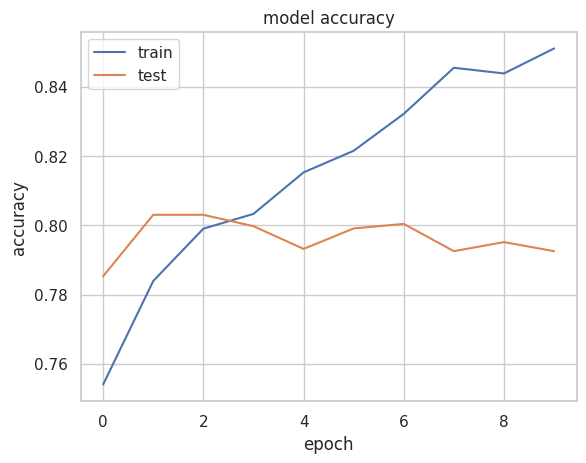

102/102 [==============================] - 1s 7ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
plot_hist(history=history1)
save_submission(model1, test_token, 'wk4_submission1.csv')

In [ ]:
save_submission(model1, test_token, 'week4_submission1.csv')

102/102 [==============================] - 1s 7ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
add_to_results('Model 1','Base CNN Model', 0.7925, 0.777)

**Analysis**

The accuracy plot indicates that the training accuracy improves consistently over epochs. However, the test (validation) accuracy is fluctuating and doesn't show the same improvement, suggesting that the model may be starting to overfit the training data.

We can try few things:

* Add Regularization
* Update Dropout rates
* Adjust LSTM
* Early stopping
* Learning Rate Experimentation
* Bi-directional LSTM


**Model#2**

Mostly keeping model from #1 above intact. We are changing dropout to 0.3

In [35]:
embed_dim = 100
lstm_out = 100
model2 = Sequential()
model2.add(Embedding(input_dim=vocab_length, output_dim=100, embeddings_initializer=Constant(embedding_matrix), trainable=False))
model2.add(Dropout(0.3))
model2.add(LSTM(lstm_out, dropout=0.3, recurrent_dropout=0.4))
model2.add(Dense(1,activation='sigmoid'))
adam = optimizers.Adam(learning_rate=0.002)
model2.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         1248800   
                                                                 
 dropout_2 (Dropout)         (None, None, 100)         0         
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1329301 (5.07 MB)
Trainable params: 80501 (314.46 KB)
Non-trainable params: 1248800 (4.76 MB)
_________________________________________________________________
None


In [36]:
history_diff_dropout = model2.fit(X,y, epochs = 10,validation_split = 0.2, batch_size=32)

Epoch 1/10
191/191 [==============================] - 23s 103ms/step - loss: 0.5253 - accuracy: 0.7414 - val_loss: 0.4378 - val_accuracy: 0.8050
Epoch 2/10
191/191 [==============================] - 24s 125ms/step - loss: 0.4890 - accuracy: 0.7693 - val_loss: 0.4767 - val_accuracy: 0.7820
Epoch 3/10
191/191 [==============================] - 27s 143ms/step - loss: 0.4727 - accuracy: 0.7810 - val_loss: 0.4376 - val_accuracy: 0.8056
Epoch 4/10
191/191 [==============================] - 19s 97ms/step - loss: 0.4584 - accuracy: 0.7875 - val_loss: 0.4323 - val_accuracy: 0.7984
Epoch 5/10
191/191 [==============================] - 20s 104ms/step - loss: 0.4441 - accuracy: 0.7980 - val_loss: 0.4555 - val_accuracy: 0.7873
Epoch 6/10
191/191 [==============================] - 21s 110ms/step - loss: 0.4325 - accuracy: 0.8034 - val_loss: 0.4509 - val_accuracy: 0.7971
Epoch 7/10
191/191 [==============================] - 20s 105ms/step - loss: 0.4163 - accuracy: 0.8131 - val_loss: 0.4629 - val_acc

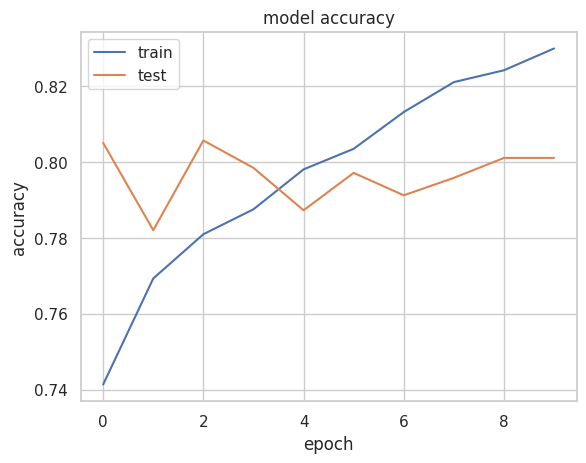

102/102 [==============================] - 2s 11ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
plot_hist(history_diff_dropout)
save_submission(model2, test_token, 'wk4_submission2.csv')

**Analysis:**
Model looks better than first one but can be better as validation accuracy stops going up with training one

In [29]:
add_to_results('Model 2','Base CNN Model - Dropout Changed', 0.801, 0.795)

**Model#3**

Changing **learning rate from 0.002 to 0.0001**. Keeping rest of model from #2 above.

In [42]:
embed_dim = 100
lstm_out = 100
model3 = Sequential()
model3.add(Embedding(input_dim=vocab_length, output_dim=100, embeddings_initializer=Constant(embedding_matrix), trainable=False))
model3.add(Dropout(0.2))
model3.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model3.add(Dense(1,activation='sigmoid'))
adam = optimizers.Adam(learning_rate=0.0001)
model3.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model3.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 100)         1248800   
                                                                 
 dropout_5 (Dropout)         (None, None, 100)         0         
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1329301 (5.07 MB)
Trainable params: 80501 (314.46 KB)
Non-trainable params: 1248800 (4.76 MB)
_________________________________________________________________
None


In [43]:
history_diff_lr = model3.fit(X,y, epochs = 10,validation_split = 0.2, batch_size=32)

Epoch 1/10
191/191 [==============================] - 28s 120ms/step - loss: 0.6077 - accuracy: 0.6985 - val_loss: 0.5037 - val_accuracy: 0.7919
Epoch 2/10
191/191 [==============================] - 21s 108ms/step - loss: 0.5146 - accuracy: 0.7608 - val_loss: 0.4549 - val_accuracy: 0.7984
Epoch 3/10
191/191 [==============================] - 18s 94ms/step - loss: 0.4967 - accuracy: 0.7683 - val_loss: 0.4522 - val_accuracy: 0.8063
Epoch 4/10
191/191 [==============================] - 16s 83ms/step - loss: 0.4856 - accuracy: 0.7732 - val_loss: 0.4418 - val_accuracy: 0.8096
Epoch 5/10
191/191 [==============================] - 21s 109ms/step - loss: 0.4771 - accuracy: 0.7808 - val_loss: 0.4417 - val_accuracy: 0.8083
Epoch 6/10
191/191 [==============================] - 24s 128ms/step - loss: 0.4746 - accuracy: 0.7819 - val_loss: 0.4369 - val_accuracy: 0.8076
Epoch 7/10
191/191 [==============================] - 28s 145ms/step - loss: 0.4678 - accuracy: 0.7877 - val_loss: 0.4426 - val_accu

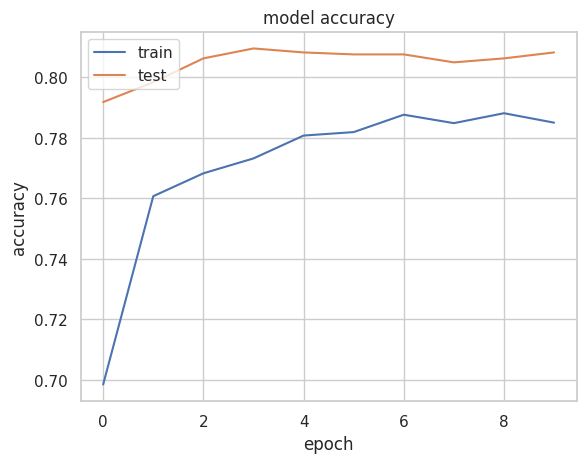

102/102 [==============================] - 1s 7ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
plot_hist(history_diff_lr)
save_submission(model3, test_token, '5511_week4_submission3.csv')

**Analysis:** This model does not seem to have problem of over-fitting on training data. No big spikes either.

In [30]:
add_to_results('Model 3','Learning Rate Changed', 0.808, 0.778)

In [ ]:
history_diff_lr_batch = model3.fit(X,y, epochs = 20,validation_split = 0.2, batch_size=64)

Epoch 1/20
96/96 [==============================] - 9s 91ms/step - loss: 0.4742 - accuracy: 0.7788 - val_loss: 0.4413 - val_accuracy: 0.8096
Epoch 2/20
96/96 [==============================] - 13s 138ms/step - loss: 0.4760 - accuracy: 0.7760 - val_loss: 0.4486 - val_accuracy: 0.8070
Epoch 3/20
96/96 [==============================] - 7s 73ms/step - loss: 0.4727 - accuracy: 0.7798 - val_loss: 0.4445 - val_accuracy: 0.8096
Epoch 4/20
96/96 [==============================] - 12s 128ms/step - loss: 0.4745 - accuracy: 0.7783 - val_loss: 0.4486 - val_accuracy: 0.8076
Epoch 5/20
96/96 [==============================] - 9s 98ms/step - loss: 0.4673 - accuracy: 0.7841 - val_loss: 0.4504 - val_accuracy: 0.8063
Epoch 6/20
96/96 [==============================] - 9s 92ms/step - loss: 0.4674 - accuracy: 0.7869 - val_loss: 0.4486 - val_accuracy: 0.8070
Epoch 7/20
96/96 [==============================] - 13s 135ms/step - loss: 0.4702 - accuracy: 0.7806 - val_loss: 0.4486 - val_accuracy: 0.8070
Epoch 8

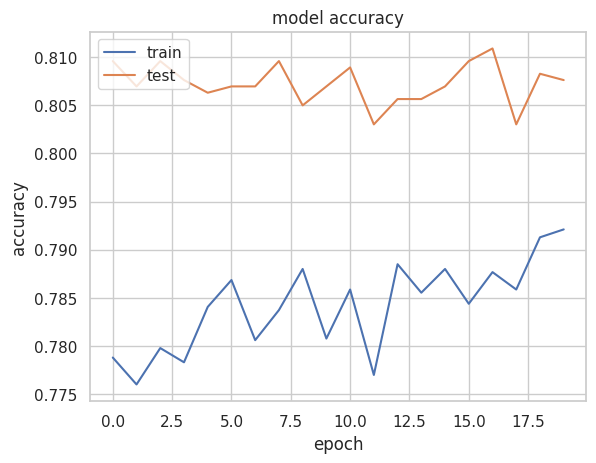

In [ ]:
plot_hist(history_diff_lr_batch)

**Analysis:** Tried different batch size but not much effect

**Model#4**

Let us change few things in Model from #2:

**Stacked LSTM Layers**: This model features two LSTM layers stacked on top of each other. Stacking LSTMs can help the model capture more complex patterns in the data. The first LSTM layer also includes return_sequences=True, which means that it returns the full sequence of outputs to the next layer (another LSTM layer), rather than just the output of the last time step.

**Additional Dropout Layers**: There are additional Dropout layers after each LSTM layer with a dropout rate of 0.3. These are meant to further reduce overfitting by randomly setting a portion of the LSTM units' outputs to 0.

**L1 Regularization on Dense Layer**: L1 regularization has been added to the kernel and bias of the output Dense layer. This regularization technique can be beneficial for feature selection if the model's input includes irrelevant features.

In [46]:
embed_dim = 100
lstm_out = 100
model4 = Sequential()
model4.add(Embedding(input_dim=vocab_length, output_dim=100, embeddings_initializer=Constant(embedding_matrix), trainable=False))
model4.add(Dropout(0.2))
model4.add(LSTM(lstm_out, dropout=0.2, return_sequences=True,recurrent_dropout=0.2))
model4.add(Dropout(0.2))
model4.add(LSTM(lstm_out,dropout=0.2, recurrent_dropout=0.2))
model4.add(Dropout(0.2))
#model4.add(Dense(1,activation='sigmoid'))

model4.add(Dense(1, activation='sigmoid',
                 kernel_regularizer=tf.keras.regularizers.l1(0.01),
                 bias_regularizer=tf.keras.regularizers.l1(0.01)))

adam = optimizers.Adam(learning_rate=0.0001)
model4.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model4.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 100)         1248800   
                                                                 
 dropout_6 (Dropout)         (None, None, 100)         0         
                                                                 
 lstm_6 (LSTM)               (None, None, 100)         80400     
                                                                 
 dropout_7 (Dropout)         (None, None, 100)         0         
                                                                 
 lstm_7 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 1)                

In [47]:
history_model4 = model4.fit(X,y, epochs = 20,validation_split = 0.2, batch_size=32)

Epoch 1/20
191/191 [==============================] - 59s 259ms/step - loss: 0.7218 - accuracy: 0.6941 - val_loss: 0.6109 - val_accuracy: 0.7787
Epoch 2/20
191/191 [==============================] - 43s 225ms/step - loss: 0.6203 - accuracy: 0.7542 - val_loss: 0.5663 - val_accuracy: 0.7886
Epoch 3/20
191/191 [==============================] - 38s 200ms/step - loss: 0.5951 - accuracy: 0.7598 - val_loss: 0.5583 - val_accuracy: 0.7886
Epoch 4/20
191/191 [==============================] - 54s 281ms/step - loss: 0.5843 - accuracy: 0.7637 - val_loss: 0.5399 - val_accuracy: 0.7945
Epoch 5/20
191/191 [==============================] - 42s 220ms/step - loss: 0.5660 - accuracy: 0.7734 - val_loss: 0.5212 - val_accuracy: 0.7984
Epoch 6/20
191/191 [==============================] - 35s 181ms/step - loss: 0.5537 - accuracy: 0.7724 - val_loss: 0.5199 - val_accuracy: 0.7971
Epoch 7/20
191/191 [==============================] - 57s 301ms/step - loss: 0.5436 - accuracy: 0.7768 - val_loss: 0.5030 - val_ac

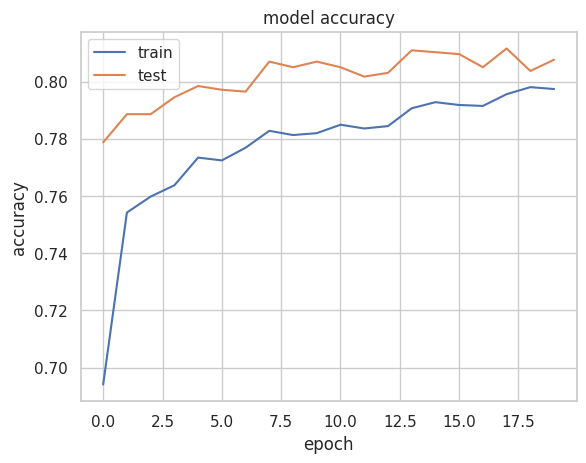

102/102 [==============================] - 3s 26ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
plot_hist(history_model4)
save_submission(model4, test_token, 'wk4_submission4.csv')

In [31]:
add_to_results('Model 4','Complex Model - More Layers', 0.808, 0.79803)

**Model #5**

Adding BatchNormalization to Model#4. This can be added before dropout layers

In [49]:
embed_dim = 100
lstm_out = 100
model5 = Sequential()
model5.add(Embedding(input_dim=vocab_length, output_dim=100, embeddings_initializer=Constant(embedding_matrix), trainable=False))
# Add batch normalization layer after embedding
model5.add(BatchNormalization())
model5.add(Dropout(0.2))
model5.add(LSTM(lstm_out, dropout=0.2, return_sequences=True,recurrent_dropout=0.2))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))
model5.add(LSTM(lstm_out,dropout=0.2, recurrent_dropout=0.2))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))

model5.add(Dense(1, activation='sigmoid',
                 kernel_regularizer=tf.keras.regularizers.l1(0.01),
                 bias_regularizer=tf.keras.regularizers.l1(0.01)))

adam = optimizers.Adam(learning_rate=0.0001)
model5.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model5.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 100)         1248800   
                                                                 
 batch_normalization (Batch  (None, None, 100)         400       
 Normalization)                                                  
                                                                 
 dropout_9 (Dropout)         (None, None, 100)         0         
                                                                 
 lstm_8 (LSTM)               (None, None, 100)         80400     
                                                                 
 batch_normalization_1 (Bat  (None, None, 100)         400       
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, None, 100)        

In [50]:
history_model5 = model5.fit(X,y, epochs = 20,validation_split = 0.2, batch_size=32)

Epoch 1/20
191/191 [==============================] - 54s 221ms/step - loss: 0.8315 - accuracy: 0.6258 - val_loss: 0.6342 - val_accuracy: 0.7663
Epoch 2/20
191/191 [==============================] - 56s 293ms/step - loss: 0.7362 - accuracy: 0.6957 - val_loss: 0.5933 - val_accuracy: 0.7833
Epoch 3/20
191/191 [==============================] - 46s 239ms/step - loss: 0.7075 - accuracy: 0.7051 - val_loss: 0.5992 - val_accuracy: 0.7886
Epoch 4/20
191/191 [==============================] - 44s 232ms/step - loss: 0.6730 - accuracy: 0.7172 - val_loss: 0.5934 - val_accuracy: 0.7938
Epoch 5/20
191/191 [==============================] - 50s 263ms/step - loss: 0.6672 - accuracy: 0.7266 - val_loss: 0.5854 - val_accuracy: 0.7932
Epoch 6/20
191/191 [==============================] - 44s 228ms/step - loss: 0.6384 - accuracy: 0.7442 - val_loss: 0.5790 - val_accuracy: 0.7919
Epoch 7/20
191/191 [==============================] - 43s 227ms/step - loss: 0.6188 - accuracy: 0.7478 - val_loss: 0.5775 - val_ac

In [36]:
plot_hist(history_model5)
save_submission(model5, test_token, 'wk4_submission5.csv')
#accidentally reran when not connected, so output cleared

In [37]:
add_to_results('Model 5','Added BatchNormalization', 0.805, 0.796)

In [58]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [61]:
embed_dim = 100
lstm_out = 100
model6 = Sequential()
model6.add(Embedding(input_dim=vocab_length, output_dim=100, embeddings_initializer=Constant(embedding_matrix), trainable=False))
# Add batch normalization layer after embedding
model6.add(BatchNormalization())
model6.add(Dropout(0.3))
model6.add(LSTM(lstm_out, dropout=0.3, return_sequences=True,recurrent_dropout=0.3))
model6.add(BatchNormalization())
model6.add(Dropout(0.3))
model6.add(LSTM(lstm_out,dropout=0.3, recurrent_dropout=0.3))
model6.add(BatchNormalization())
model6.add(Dropout(0.3))

model6.add(Dense(1, activation='sigmoid',
                 kernel_regularizer=tf.keras.regularizers.l1(0.01),
                 bias_regularizer=tf.keras.regularizers.l1(0.01)))

adam = optimizers.Adam(learning_rate=0.0001)
model6.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model6.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 100)         1248800   
                                                                 
 batch_normalization_6 (Bat  (None, None, 100)         400       
 chNormalization)                                                
                                                                 
 dropout_17 (Dropout)        (None, None, 100)         0         
                                                                 
 lstm_14 (LSTM)              (None, None, 100)         80400     
                                                                 
 batch_normalization_7 (Bat  (None, None, 100)         400       
 chNormalization)                                                
                                                                 
 dropout_18 (Dropout)        (None, None, 100)       

In [62]:
history_model6 = model6.fit(X,y, epochs = 25,validation_split = 0.2, batch_size=32, callbacks=[early_stopping])

Epoch 1/25
191/191 [==============================] - 49s 214ms/step - loss: 0.9755 - accuracy: 0.5461 - val_loss: 0.6703 - val_accuracy: 0.7367
Epoch 2/25
191/191 [==============================] - 59s 312ms/step - loss: 0.8546 - accuracy: 0.6141 - val_loss: 0.6023 - val_accuracy: 0.7794
Epoch 3/25
191/191 [==============================] - 40s 207ms/step - loss: 0.7876 - accuracy: 0.6616 - val_loss: 0.6190 - val_accuracy: 0.7794
Epoch 4/25
191/191 [==============================] - 40s 207ms/step - loss: 0.7715 - accuracy: 0.6742 - val_loss: 0.6215 - val_accuracy: 0.7814
Epoch 5/25
191/191 [==============================] - 59s 309ms/step - loss: 0.7276 - accuracy: 0.6961 - val_loss: 0.6163 - val_accuracy: 0.7833
Epoch 6/25
191/191 [==============================] - 40s 210ms/step - loss: 0.7232 - accuracy: 0.7048 - val_loss: 0.6076 - val_accuracy: 0.7879
Epoch 7/25
191/191 [==============================] - 39s 202ms/step - loss: 0.7021 - accuracy: 0.7092 - val_loss: 0.6022 - val_ac

102/102 [==============================] - 2s 12ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

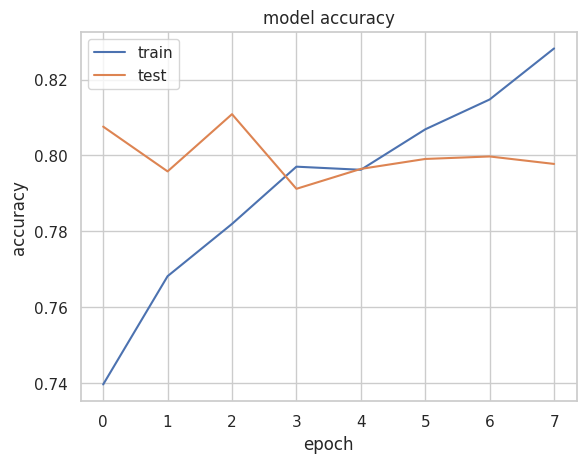

In [60]:
save_submission(model6, test_token, 'wk4_submission6.csv')
plot_hist(history_model6)

**Model #7**

Adding BiDirectional layers. This would be tried for higher numbber of Epochs with early stopping

In [63]:
embed_dim = 100
lstm_out = 100
model7 = Sequential()
model7.add(Embedding(input_dim=vocab_length, output_dim=100, embeddings_initializer=Constant(embedding_matrix), trainable=False))
model7.add(Dropout(0.2))
model7.add(Bidirectional(LSTM(lstm_out, dropout=0.2, return_sequences=True,recurrent_dropout=0.3)))
model7.add(Dropout(0.2))
model7.add(Bidirectional(LSTM(lstm_out,dropout=0.2, recurrent_dropout=0.3)))
model7.add(Dropout(0.2))

model7.add(Dense(1, activation='sigmoid',
                 kernel_regularizer=tf.keras.regularizers.l1(0.01),
                 bias_regularizer=tf.keras.regularizers.l1(0.01)))

adam = optimizers.Adam(learning_rate=0.0001)
model7.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model7.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, None, 100)         1248800   
                                                                 
 dropout_20 (Dropout)        (None, None, 100)         0         
                                                                 
 bidirectional (Bidirection  (None, None, 200)         160800    
 al)                                                             
                                                                 
 dropout_21 (Dropout)        (None, None, 200)         0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 200)               240800    
 onal)                                                           
                                                                 
 dropout_22 (Dropout)        (None, 200)             

Epoch 1/25
191/191 [==============================] - 103s 478ms/step - loss: 0.7430 - accuracy: 0.7034 - val_loss: 0.6014 - val_accuracy: 0.7945
Epoch 2/25
191/191 [==============================] - 84s 438ms/step - loss: 0.6347 - accuracy: 0.7658 - val_loss: 0.5719 - val_accuracy: 0.8063
Epoch 3/25
191/191 [==============================] - 83s 432ms/step - loss: 0.5966 - accuracy: 0.7742 - val_loss: 0.5441 - val_accuracy: 0.8089
Epoch 4/25
191/191 [==============================] - 87s 456ms/step - loss: 0.5673 - accuracy: 0.7808 - val_loss: 0.5228 - val_accuracy: 0.8089
Epoch 5/25
191/191 [==============================] - 75s 389ms/step - loss: 0.5549 - accuracy: 0.7775 - val_loss: 0.5147 - val_accuracy: 0.8076
Epoch 6/25
191/191 [==============================] - 88s 460ms/step - loss: 0.5378 - accuracy: 0.7836 - val_loss: 0.5024 - val_accuracy: 0.8076
Epoch 7/25
191/191 [==============================] - 75s 391ms/step - loss: 0.5219 - accuracy: 0.7901 - val_loss: 0.5051 - val_a

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

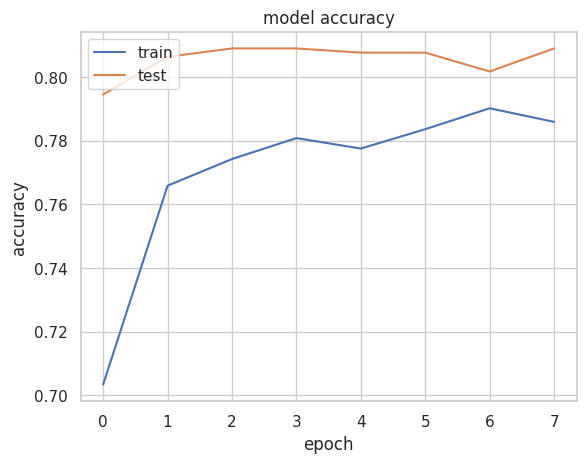

In [64]:
history_model7 = model7.fit(X,y, epochs = 25,validation_split = 0.2, batch_size=32,callbacks=[early_stopping])
save_submission(model7, test_token, 'wk4_submission7.csv')
plot_hist(history_model7)

In [38]:
add_to_results('Model 7','Biditectional LSTM', 0.809, 0.778)

# Analysis

In [39]:
print(df_results)

  Model Name                 Model Description  Val Accuracy  Kaggle Score
0    Model 1                    Base CNN Model        0.7925       0.77700
1    Model 2  Base CNN Model - Dropout Changed        0.8010       0.79500
2    Model 3             Learning Rate Changed        0.8080       0.77800
3    Model 4       Complex Model - More Layers        0.8080       0.79803
4    Model 5          Added BatchNormalization        0.8050       0.79600
5    Model 5          Added BatchNormalization        0.8050       0.79600
6    Model 7                Biditectional LSTM        0.8090       0.77800


* I tried different variations of LSTM models and submitted the results on the test data to kaggle.I had to be careful as most mdoels had tendency to overfit on training data.

* My Public Score was between 0.77 and 0.79.

* Initially simple model with drop rate of 0.3 (Model#2) performed pretty well compared to some complex models but it had high overfitting as was evident by increasing number of epochs with early stopping

* I further tried changing learning rate and adding regularization, batch normalization. This did not improve score a lot, only marginally to 0.79803 but there did not seem to be much overfitting. Also tried BiDirectional.

* If I had to pick between Model #2 and #3, I would pick #3 with slighly lower score as it has much smoother curve with lower learing rate

* I picked Model#4 from above based on best public score as well as not having overfitting issue on training data.


# Conclusion




*   This project helped me practice concepts needed in NLP. I did not expect overfitting with low numer of epochs.
*   In future, I would like to try more layers, different word embeddings and tokenizer
*   Different validation method like k-fold cross validation can also be tried
*   Overall, this project reinforced that we need to be patient and try various parameters but not changinbg too many of them at same time



# References



*   [LSTM](https://keras.io/api/layers/recurrent_layers/lstm/)
*   [Embeddings-LSTM](https://www.kaggle.com/code/andreshg/nlp-glove-bert-tf-idf-lstm-explained)



# Github Link

[Github Project Link](https://github.com/manjit28/dtsa5511.git)

Project contains:

* Python Notebook
* Kaggle Project Leader Score